Inspired by:
https://gist.github.com/ckiefer0/9b742305db2c7d2d47b8af776a6047f4

In [1]:
import os
import mne
import copy
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
from nilearn.datasets import fetch_atlas_aal
from nilearn.datasets import fetch_atlas_talairach

# Setup
---

In [2]:
data_path = mne.datasets.sample.data_path()

## AAL (Anatomical Automatic Labelling)

In [6]:
aal_atlas = fetch_atlas_aal(data_dir = './Test/')


Dataset created in ./Test/aal_SPM12



 ...done. (1 seconds, 0 min)
Extracting data from ./Test/aal_SPM12\3a9c53489084ec6956c5511cf914e8a1\aal_for_SPM12.tar.gz..... done.


In [11]:
aal_img = nib.load('./Test/aal_SPM12/aal/atlas/AAL.nii')

aal_labels = {}
for idx, label in enumerate(aal_atlas['labels']):
    aal_labels[label] = int(aal_atlas['indices'][idx])

aal_labels['0'] = 'Background'

aal_data = aal_img.get_fdata()

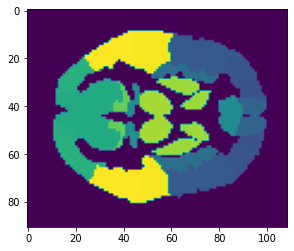

In [10]:
plt.imshow(aal_data[:, :, 40])

## Talairach

In [6]:
tal_atlas = fetch_atlas_talairach(level_name='ba', data_dir=data_path)

In [7]:
tal_img = tal_atlas['maps']

tal_labels = {}
for idx, label in enumerate(tal_atlas['labels']):
    tal_labels[label] = idx
    
tal_data = tal_img.get_fdata()

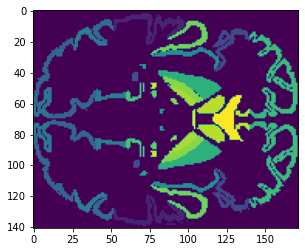

In [8]:
plt.imshow(tal_data[:, :, 40])

## PET scan

In [9]:
pet_scan = nib.load('./Git/Master-thesis/Development/data/SPM_categorised/ADNI1/CN/' + os.listdir('./Git/Master-thesis/Development/data/SPM_categorised/ADNI1/CN/')[0]).get_fdata()
pet_scan_resized = zoom(pet_scan, (aal_data.shape[0] / pet_scan.shape[0], aal_data.shape[1] / pet_scan.shape[1], aal_data.shape[2] / pet_scan.shape[2]))

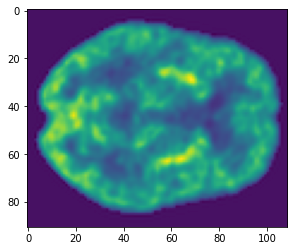

In [10]:
plt.imshow(pet_scan_resized[:, :, 40])

# Extraction
---

## Available regions

In [12]:
aal_labels

{'Precentral_L': 2001,
 'Precentral_R': 2002,
 'Frontal_Sup_L': 2101,
 'Frontal_Sup_R': 2102,
 'Frontal_Sup_Orb_L': 2111,
 'Frontal_Sup_Orb_R': 2112,
 'Frontal_Mid_L': 2201,
 'Frontal_Mid_R': 2202,
 'Frontal_Mid_Orb_L': 2211,
 'Frontal_Mid_Orb_R': 2212,
 'Frontal_Inf_Oper_L': 2301,
 'Frontal_Inf_Oper_R': 2302,
 'Frontal_Inf_Tri_L': 2311,
 'Frontal_Inf_Tri_R': 2312,
 'Frontal_Inf_Orb_L': 2321,
 'Frontal_Inf_Orb_R': 2322,
 'Rolandic_Oper_L': 2331,
 'Rolandic_Oper_R': 2332,
 'Supp_Motor_Area_L': 2401,
 'Supp_Motor_Area_R': 2402,
 'Olfactory_L': 2501,
 'Olfactory_R': 2502,
 'Frontal_Sup_Medial_L': 2601,
 'Frontal_Sup_Medial_R': 2602,
 'Frontal_Med_Orb_L': 2611,
 'Frontal_Med_Orb_R': 2612,
 'Rectus_L': 2701,
 'Rectus_R': 2702,
 'Insula_L': 3001,
 'Insula_R': 3002,
 'Cingulum_Ant_L': 4001,
 'Cingulum_Ant_R': 4002,
 'Cingulum_Mid_L': 4011,
 'Cingulum_Mid_R': 4012,
 'Cingulum_Post_L': 4021,
 'Cingulum_Post_R': 4022,
 'Hippocampus_L': 4101,
 'Hippocampus_R': 4102,
 'ParaHippocampal_L': 4111,
 '

In [15]:
a_file = open("labels.pkl", "wb")
pickle.dump(aal_labels, a_file)
a_file.close()

## Mask

In [12]:
mask = aal_data != aal_labels['Hippocampus_L']

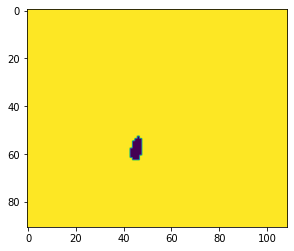

In [16]:
plt.imshow(mask[:, :, 35])

## Extraction

In [14]:
pet_scan_masked = copy.copy(pet_scan_resized)
pet_scan_masked[mask] = 0

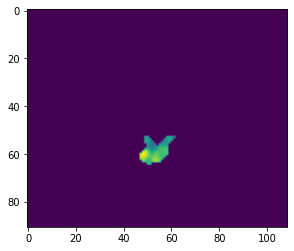

In [15]:
plt.imshow(pet_scan_masked[:, :, 30])